In [1]:
import math
import json
import numpy
import matplotlib.pyplot as plt
import requests
from datetime import date, timedelta

Next we read in the data from the covidtracking.com site into a list of dictionaries using the "requests" package to access the website and the "json" package to convert the result into a list of dictionaries.

In [2]:
url = "https://covidtracking.com/api/us/daily"
text = requests.get(url).text
us_data = json.loads(text)
print('the length of the list us_data is',len(us_data))
print(us_data[0])
print("\n\n and here is the first element of us_data\n\n")
us_data[-1]


the length of the list us_data is 171
{'date': 20200710, 'states': 56, 'positive': 3167984, 'negative': 35751437, 'pending': 2493, 'hospitalizedCurrently': 51544, 'hospitalizedCumulative': 257571, 'inIcuCurrently': 5889, 'inIcuCumulative': 11523, 'onVentilatorCurrently': 2197, 'onVentilatorCumulative': 1118, 'recovered': 983185, 'dateChecked': '2020-07-10T00:00:00Z', 'death': 126444, 'hospitalized': 257571, 'lastModified': '2020-07-10T00:00:00Z', 'total': 38921914, 'totalTestResults': 38919421, 'posNeg': 38919421, 'deathIncrease': 854, 'hospitalizedIncrease': 2318, 'negativeIncrease': 756730, 'positiveIncrease': 66645, 'totalTestResultsIncrease': 823375, 'hash': 'f32acc8a0a75e68d628c9ba1fe481bac263d093e'}


 and here is the first element of us_data




{'date': 20200122,
 'states': 1,
 'positive': 2,
 'negative': 0,
 'pending': None,
 'hospitalizedCurrently': None,
 'hospitalizedCumulative': None,
 'inIcuCurrently': None,
 'inIcuCumulative': None,
 'onVentilatorCurrently': None,
 'onVentilatorCumulative': None,
 'recovered': None,
 'dateChecked': '2020-01-22T00:00:00Z',
 'death': None,
 'hospitalized': None,
 'lastModified': '2020-01-22T00:00:00Z',
 'total': 2,
 'totalTestResults': 2,
 'posNeg': 2,
 'deathIncrease': 0,
 'hospitalizedIncrease': 0,
 'negativeIncrease': 0,
 'positiveIncrease': 0,
 'totalTestResultsIncrease': 0,
 'hash': 'd538c99729d1fee626212d1878a100c1e1204a5f'}

Here we plot the ratio of positive tests to total tests as a function of days after the start of data collection on 3/4/2020

[100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 95, 97, 79, 68, 37, 33, 28, 27, 29, 27, 24, 21, 19, 16, 16, 16, 14, 16, 15, 15, 15, 15, 16, 16, 16, 15, 15, 16, 16, 16, 17, 17, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 16, 16, 16, 16, 15, 15, 15, 15, 14, 14, 14, 14, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]


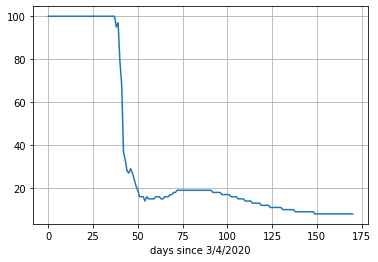

In [3]:
z = [(x['date'],round(x['positive']/x['total']*100)) for x in us_data]
z.sort(key=lambda x: x[0])
xs = [x[1] for x in z]
print(xs)
fig, ax = plt.subplots()
line1, = ax.plot(xs)
plt.grid(True)
plt.xlabel('days since 3/4/2020')
plt.show()

Now we clean up the data a bit (replace None values with 0)
and we get the values for the number of positive cases and the deaths
These are lists where the element at position k is the number of cases or deaths
on day k after 3/3/2020

In [4]:
us_data.sort(key=lambda x: x['date'])
data = us_data

def clean(n):
    if n==None:
        return 0
    else:
        return n

positives = [clean(x['positive']) for x in data]
deaths = [clean(x['death']) for x in data]
dates = [clean(x['date']) for x in data]
print("Here is the number of US deaths each day since 3/4/2020",deaths)
print("Here is the number of US c19 cases each day since 3/4/2020",positives)

Here is the number of US deaths each day since 3/4/2020 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 4, 5, 8, 11, 14, 16, 20, 26, 27, 31, 35, 37, 43, 51, 55, 64, 79, 100, 122, 153, 199, 267, 328, 471, 568, 799, 1031, 1342, 1743, 2262, 2778, 3355, 4216, 5204, 6353, 7612, 9052, 10337, 11591, 13547, 15491, 17463, 19518, 21500, 23130, 24702, 26989, 29475, 31616, 33693, 35530, 37263, 39028, 41457, 43522, 45286, 47151, 48865, 50053, 51290, 53332, 56024, 58141, 59894, 61435, 62641, 63653, 66098, 68030, 70770, 72549, 73981, 75005, 75892, 77364, 79060, 80931, 82433, 83417, 84263, 85107, 86432, 87824, 89212, 90547, 91607, 92285, 92840, 93480, 94798, 96024, 97203, 98132, 98781, 99446, 100405, 101396, 102284, 103107, 103834, 104280, 104940, 105838, 106723, 107621, 108393, 109084, 109439, 109819, 110548, 111315, 112019, 112674, 113302, 113594, 113877, 114585, 115309, 117810, 118446, 118955, 119226, 119556, 120152, 120853, 121523, 12

We can now plot the data using matplotlib.pyplot which has been imported as plt

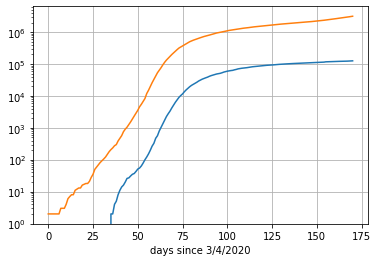

In [5]:
fig, ax = plt.subplots()
line1, = ax.plot(deaths)
line2, = ax.plot(positives)
plt.yscale('log')
plt.grid(True)
plt.xlabel('days since 3/4/2020')


plt.show()


Next we make a rough calculation of the average rate of increase per day over the past week to get the daily increase ratio for deaths and cases and we use it to see how accurately in predicts todays deaths/cases starting from a week ago.

In [6]:
# calulate d = death increase per day ratio
d_death = math.exp(math.log(deaths[-1]/deaths[-8])/7)
print(d_death)
print(deaths[-8:])
print(deaths[-8]*d_death**7)
n_death = len(deaths)

1.0049514014415282
[122147, 122453, 122662, 122904, 123826, 124723, 125590, 126444]
126444.00000000003


In [7]:
# calulate d = death increase per day ratio
d_pos = math.exp(math.log(positives[-1]/positives[-8])/7)
print(d_pos)
print(positives[-8:])
print(round(positives[-8]*d_pos**7))
n_pos = len(positives)

1.0185006171380804
[2786467, 2838558, 2881160, 2928590, 2980356, 3042503, 3101339, 3167984]
3167984


We can now start to make a prediction, since we have the daily rate of increase for deaths and cases. 
We also calculate the constant value to represent these as pure exponentials
``` python
f(k) = c * d**k
```


Let's now calculate the c and d coefficients for the death and infection curves

In [8]:
days=60
death_prediction = [round(deaths[-1]*d_death**(k-n_death+1)) for k in range(n_death,n_death+days)]
#print(death_prediction)
positive_prediction = [round(positives[-1]*d_pos**(k-n_pos+1)) for k in range(n_pos,n_pos+days)]
#print(positive_prediction)
c_pos = positives[-1]*d_pos**(1-n_pos)
print('c_pos',c_pos)
print('d_pos',d_pos)
c_death = deaths[-1]*d_death**(1-n_death)
print('c_death',c_death)
print('d_death',d_death)

c_pos 140398.53516167795
d_pos 1.0185006171380804
c_death 54605.70235201202
d_death 1.0049514014415282


Finally, we plot our predictions and also draw lines at on million, 330 million (the US population), and 7.53 billion (the world population)

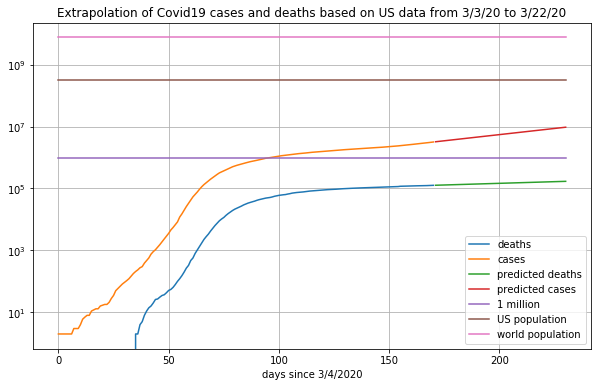

In [9]:
plt.rcParams['figure.figsize'] = [10.0,6.0]
fig2, ax = plt.subplots()

line1, = ax.plot(deaths)
line2, = ax.plot(positives)

# here are the predictions
line3, = ax.plot(range(n_death,n_death+days),death_prediction)
line4, = ax.plot(range(n_pos,n_pos+days), positive_prediction)

# here are the horizontal lines
line5, = ax.plot(range(0,n_pos+days),[1000000]*(n_pos+days))
line6, = ax.plot(range(0,n_pos+days),[330000000]*(n_pos+days))
line7, = ax.plot(range(0,n_pos+days),[7.53*10**9]*(n_pos+days))

# here we can plot our approximation of the deaths graph as a pure exponential function
#line8, = ax.plot(range(0,n_death+days),[c_death*d_death**k for k in range(0,n_pos+days)])
#line9, = ax.plot(range(0,n_pos+days),[c_pos*d_pos**k for k in range(0,n_pos+days)])
plt.yscale('log')
plt.grid(True)
plt.xlabel('days since 3/4/2020')
plt.legend(['deaths','cases','predicted deaths','predicted cases','1 million','US population','world population'])
plt.title("Extrapolation of Covid19 cases and deaths based on US data from 3/3/20 to 3/22/20")

# here is where we save the plot to a file and show it on the screen
plt.savefig('covid19.png')
plt.show()


# Milestones
Finally we use the exponential approxiation to see when we can expect large numbers of people to have died. This is assuming that we don't change policy and it ignores factors like herd immunity and the limited size of our population. It is just a straight extrapoloation from the exponential formula...

In [10]:
us_population = 330000000
def days_death(n):
   return math.log(n/c_death)/math.log(d_death)
def days_after(k):
    start = date(2020,3,4)
    return start+timedelta(days=k)

n_now = len(data)-1
n_1e3 = round(days_death(1e3))
n_1e4 = round(days_death(1e4))
n_1e5 = round(days_death(1e5))
n_1e6 = round(days_death(1e6))
n_1e7 = round(days_death(1e7))
print('         1K dead in',n_1e3-n_now,'days on',days_after(n_1e3))
print('        10K dead in',n_1e4-n_now,'days on',days_after(n_1e4))
print('       100K dead in',n_1e5-n_now,'days on',days_after(n_1e5))
print('  1 million dead in',n_1e6-n_now,'days on',days_after(n_1e6))
print(' 10 million dead in',n_1e7-n_now,'days on',days_after(n_1e7))

         1K dead in -980 days on 2017-12-15
        10K dead in -514 days on 2019-03-26
       100K dead in -48 days on 2020-07-04
  1 million dead in 419 days on 2021-10-14
 10 million dead in 885 days on 2023-01-23
